The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!


🏅 Most Common Gender Among Nobel Laureates: Male
🌍 Most Common Birth Country: United States of America

🎖️ Decade with Highest Proportion of US-born Winners: 2000
➡️ Proportion of US Winners in that Decade: 42.28%

🎖️ Highest Proportion of Female Winners:
➡️ Decade: 2020
➡️ Category: Literature
➡️ Female Proportion: 50.00%

🎖️ First Woman to Win a Nobel Prize:
➡️ Name: Marie Curie, née Sklodowska
➡️ Category: Physics
➡️ Year: 1903

🔁 Nobel Laureates Who Have Won More Than Once:
 - Comité international de la Croix Rouge (International Committee of the Red Cross)
 - Linus Carl Pauling
 - John Bardeen
 - Frederick Sanger
 - Marie Curie, née Sklodowska
 - Office of the United Nations High Commissioner for Refugees (UNHCR)


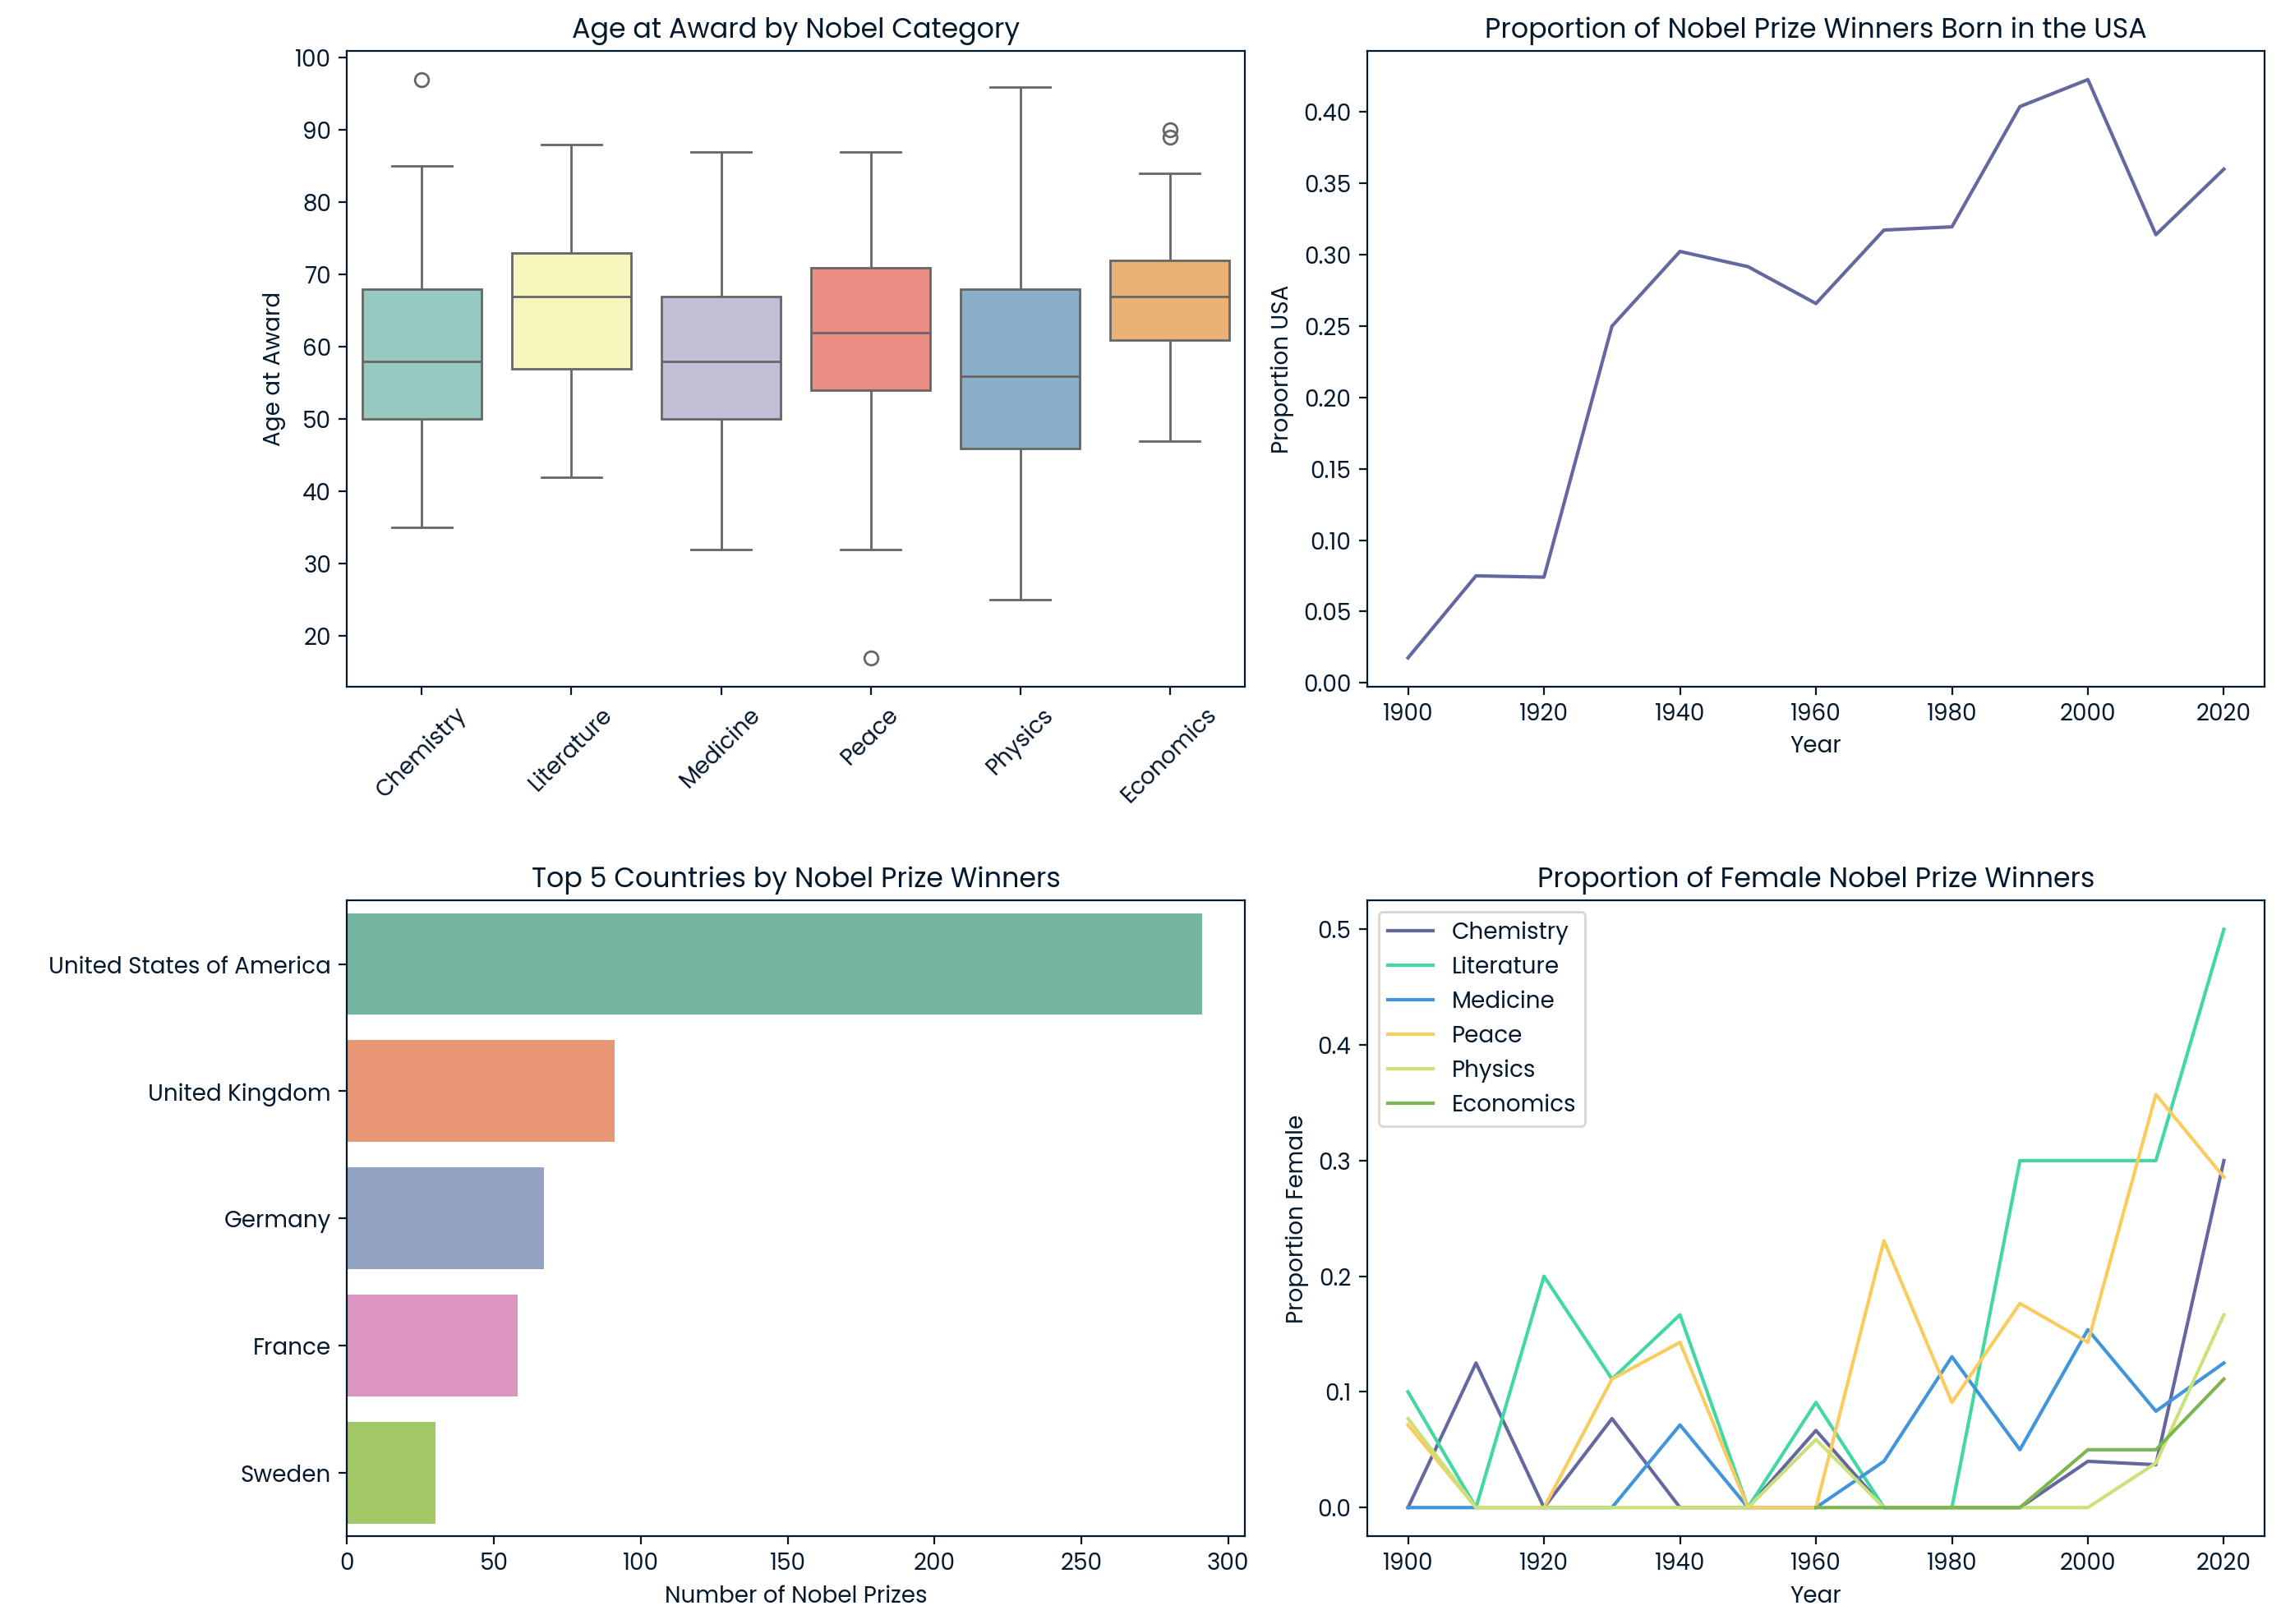

In [10]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  # Importing the missing library

# Start coding here!
nobel = pd.read_csv("data/nobel.csv")
nobel.head()

# 1. Basic Overview
top_gender = nobel["sex"].value_counts().idxmax()
top_country = nobel["birth_country"].value_counts().idxmax()

print(f"\n🏅 Most Common Gender Among Nobel Laureates: {top_gender}")
print(f"🌍 Most Common Birth Country: {top_country}")

# 2. US-born Laureates by Decade
nobel["usa_born_winner"] = nobel["birth_country"] == "United States of America"
nobel["decade"] = (np.floor(nobel["year"] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()

max_decade_usa = prop_usa_winners.loc[prop_usa_winners["usa_born_winner"].idxmax(), "decade"]
max_usa_ratio = prop_usa_winners["usa_born_winner"].max()

print(f"\n🎖️ Decade with Highest Proportion of US-born Winners: {int(max_decade_usa)}")
print(f"➡️ Proportion of US Winners in that Decade: {max_usa_ratio:.2%}")

# 3. Female Laureates Analysis
nobel["female_winners"] = nobel["sex"] == "Female"
prop_fem_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winners"].mean()

max_fem_row = prop_fem_winners.loc[prop_fem_winners["female_winners"].idxmax()]
max_decade_fem = int(max_fem_row["decade"])
max_category_fem = max_fem_row["category"]
max_ratio_fem = max_fem_row["female_winners"]

print(f"\n🎖️ Highest Proportion of Female Winners:")
print(f"➡️ Decade: {max_decade_fem}")
print(f"➡️ Category: {max_category_fem}")
print(f"➡️ Female Proportion: {max_ratio_fem:.2%}")

# 4. First Female Laureate
first_female = nobel[nobel["female_winners"]].sort_values("year").iloc[0]
first_woman_name = first_female["full_name"]
first_woman_category = first_female["category"]
first_woman_year = int(first_female["year"])

print(f"\n🎖️ First Woman to Win a Nobel Prize:")
print(f"➡️ Name: {first_woman_name}")
print(f"➡️ Category: {first_woman_category}")
print(f"➡️ Year: {first_woman_year}")

# 5. Repeat Winners
repeat_winners = nobel['full_name'].value_counts()
repeats = repeat_winners[repeat_winners > 1].index.tolist()

print(f"\n🔁 Nobel Laureates Who Have Won More Than Once:")
for name in repeats:
    print(f" - {name}")


fig, axs = plt.subplots(2, 2, figsize=(14, 10))  
sns.lineplot(ax=axs[1, 1], x='decade', y='female_winners', hue='category', data=prop_fem_winners)
axs[1, 1].legend().set_title(None) 
axs[1, 1].set_xlabel("Year")
axs[1, 1].set_ylabel("Proportion Female")
axs[1, 1].set_title("Proportion of Female Nobel Prize Winners")

sns.lineplot(ax=axs[0, 1], x='decade', y='usa_born_winner', data=prop_usa_winners)
axs[0, 1].set_xlabel("Year")
axs[0, 1].set_ylabel("Proportion USA")
axs[0, 1].set_title("Proportion of Nobel Prize Winners Born in the USA")

top_countries = nobel['birth_country'].value_counts().nlargest(5).index
filtered_data = nobel[nobel['birth_country'].isin(top_countries)]
sns.countplot(ax=axs[1, 0], data=filtered_data, y='birth_country', order=top_countries, palette='Set2') 
axs[1, 0].set_xlabel("Number of Nobel Prizes")
axs[1, 0].set_ylabel(" ")
axs[1, 0].set_title("Top 5 Countries by Nobel Prize Winners")

nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], errors='coerce')
nobel['age_at_award'] = nobel['year'] - nobel['birth_date'].dt.year
age_data = nobel.dropna(subset=['age_at_award'])
sns.boxplot(ax=axs[0, 0], data=age_data, x='category', y='age_at_award', palette='Set3')
axs[0, 0].set_xlabel(" ")
axs[0, 0].set_ylabel("Age at Award")
axs[0, 0].set_title("Age at Award by Nobel Category")
axs[0, 0].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()